In [1]:
from matplotlib import pyplot as plt
import pytesseract
import cv2
import numpy as np
import pandas as pd
import os
import shutil

# psm 6 = Assume a single uniform block of text.
config_tesseract = '--tessdata-dir ./ttesseract_langs --psm 6'
ad_config_tesseract = '--tessdata-dir ./ttesseract_langs --psm 6 digits'

# https://pyimagesearch.com/2017/02/13/recognizing-digits-with-opencv-and-python/#comment-429721

In [14]:


# Read the image


# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to the image to enhance the contrast
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Apply median blurring to remove the reflection
median = cv2.medianBlur(thresh, 3)

# Pass the image to Tesseract for OCR
text = pytesseract.image_to_string(median, config=config_tesseract)

print(text)


)



In [15]:
import cv2
import pytesseract
from skimage.filters import threshold_otsu, median
from skimage.color import rgb2gray
import skimage.io as io
import numpy as np

# Read the image
image = io.imread('cropped_8.jpg')

# Convert the image to grayscale
gray = rgb2gray(image)

# Apply thresholding to the image to enhance the contrast
threshold_level = threshold_otsu(gray)
binary_image = gray > threshold_level

# Apply median blurring to remove the reflection
median_image = median(binary_image, footprint=np.ones((3, 3)))

# Pass the image to Tesseract for OCR
text = pytesseract.image_to_string(median_image, config='--psm 7')

print(text)


pt tas | )



In [3]:
def show_img(img, size=12, title=None):
    fig = plt.gcf()
    fig.set_size_inches(size, size)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


97.0


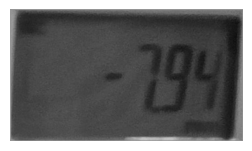

7778

T



In [9]:
# process_mask_otsu

image = cv2.imread('cropped_2.jpg')


# Get image data
# img = read_input_data(input_file)




# Convert to RGB (three dimensions)
nimRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to gray (one dimension)
nimGray = cv2.cvtColor(nimRGB, cv2.COLOR_BGR2GRAY)

# 0 means threshold level which actually is omitted because we used CV_THRESH_OTSU flag
min_threshold = 0

# 255 is a value that is going to be assigned to respectively pixels in the result 
# (namely, to all pixels which value in the source is greater then computed threshold level)
max_threshold = 150

# THRESH_BINARY | THRESH_OTSU is a required flag to perform Otsu thresholding. Because in fact we would like to perform binary thresholding,
# so we use CV_THRESH_BINARY (you can use any of 5 flags opencv provides) combined with CV_THRESH_OTSU
value, nimOTSU = cv2.threshold(nimGray, min_threshold, max_threshold, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(value)
show_img(nimGray, 3)
# Read text from image using Seven Segment training data
text_ssd = pytesseract.image_to_string(image, lang="ssd", config=config_tesseract)

# Read text from image using English character training data
text_eng = pytesseract.image_to_string(image, lang="eng", config=config_tesseract)


print(text_ssd)
print(text_eng)


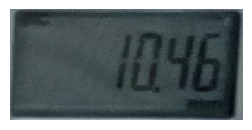

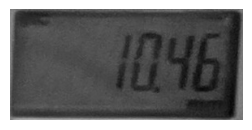

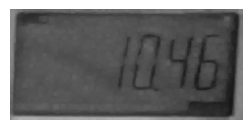

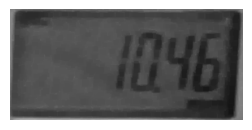

In [5]:
image = cv2.imread('cropped_13.jpg')

# Convert to RGB (three dimensions)
nimRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to gray (one dimension)
nimGray = cv2.cvtColor(nimRGB, cv2.COLOR_BGR2GRAY)
show_img(nimRGB, 3)
show_img(nimGray, 3)

# Create a kernel (structuring element)
kernel = np.ones((5,5), np.uint8)

# Perform dilation
dilation = cv2.dilate(nimGray, kernel, iterations=1)

show_img(dilation, 3)

# Create a kernel (structuring element)
kernel = np.ones((5,5), np.uint8)

# Perform closing (dilation followed by erosion)
closing = cv2.morphologyEx(nimGray, cv2.MORPH_CLOSE, kernel)

show_img(closing, 3)

# Read text from image using Seven Segment training data
text_ssd = pytesseract.image_to_string(closing, lang="ssd", config=config_tesseract)

# Read text from image using English character training data
text_eng = pytesseract.image_to_string(dilation, lang="eng", config=config_tesseract)

print(text_ssd)

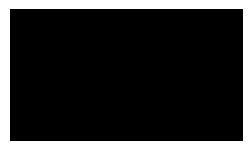

In [21]:
image = cv2.imread('cropped_2.jpg')

# Convert to RGB (three dimensions)
nimRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to gray (one dimension)
nimGray = cv2.cvtColor(nimRGB, cv2.COLOR_BGR2GRAY)

# Perform closing (dilation followed by erosion)
closing = cv2.morphologyEx(nimGray, cv2.MORPH_CLOSE, kernel)

# Define a threshold value for light grey pixels
threshold = 200

# Threshold the image to set light grey pixels to white
ret, thresh = cv2.threshold(nimGray, threshold, 255, cv2.THRESH_BINARY)

show_img(thresh, 3)

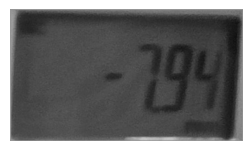

14 198


In [24]:
image = cv2.imread('cropped_2.jpg', 0)

show_img(image, 3)

print(np.min(image),np.max(image))

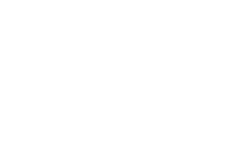

In [26]:

# Load an image
img = cv2.imread('cropped_2.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define a threshold value for light grey pixels
threshold = 200

# Threshold the image to set light grey pixels to white
ret, thresh = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)

thresh = cv2.bitwise_not(thresh)

show_img(thresh, 3)

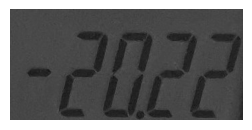

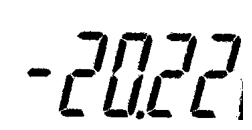

text is :-  120220.01011


In [26]:
import cv2
import pytesseract

# Load the image
image = cv2.imread("./manually_cropped/mancrop_20.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_img(gray, 3)
# Apply adaptive threshold to the grayscale image
# thresholded = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply Otsu's threshold to the grayscale image
_, thresholded = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

show_img(thresholded, 3)
# Pass the thresholded image to Tesseract OCR
# text = pytesseract.image_to_string(thresholded, lang='ssd',config='--psm 6')

text_ssd = pytesseract.image_to_string(thresholded, lang="ssd", config=ad_config_tesseract)
text_ssd = ''.join(c for c in text_ssd if c.isdigit() or c == '.' or c == '-')

print("text is :- ", text_ssd)

In [27]:
pip install ocrad

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ocrad (from versions: none)
ERROR: No matching distribution found for ocrad


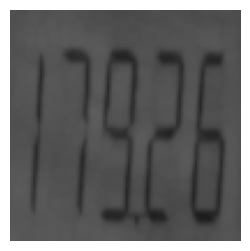

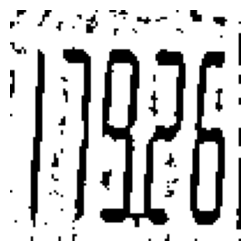

text output is :  ,  ....


In [6]:

# Load an image
# img = cv2.imread('cropped_22.jpg', 0)

img = cv2.imread("./manually_cropped/mancrop_27.jpg", 0)


width = 100
height = 100
dim = (width, height)

# resize image
resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

# show_img(img, 3)
# show_img(resized, 3)

# Blur the image
img = cv2.GaussianBlur(resized, (3, 3), 0)

# Create a kernel of size 3x3
kernel = np.ones((3,3), np.uint8)

# Perform dilation on the image
dilation = cv2.dilate(img, kernel, iterations=1)
show_img(dilation, 3)


# Apply adaptive thresholding
thresh = cv2.adaptiveThreshold(dilation, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)


show_img(thresh, 3)

# Read text from image using Seven Segment training data
text_ssd = pytesseract.image_to_string(thresh, lang="ssd", config=config_tesseract)

# Read text from image using English character training data
text_eng = pytesseract.image_to_string(thresh, lang="eng", config=config_tesseract)

print("text output is :", text_ssd, ",", text_eng, "....")

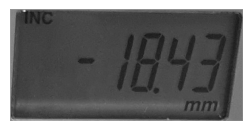

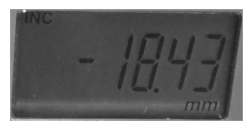

In [48]:

# Read an image
img = cv2.imread('cropped_21.jpg', 0)

# Create a kernel of size 3x3
kernel = np.ones((3,3), np.uint8)

# Perform dilation on the image
dilation = cv2.dilate(img, kernel, iterations=1)

# Display the original and dilated images
show_img(img, 3)
show_img(dilation, 3)